In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import math

# Section 1.1

In [2]:
def imgmirror(mat, w):
    (mat_row, mat_col) = mat.shape
    row = mat_row + (2*w)
    col = mat_col + (2*w)
    
    output_mat = np.zeros( shape=(row, col), dtype=np.double )
    
    output_mat[w:(mat_row+w), w:(mat_col+w)] = mat
    
    # Mirroring upper edge
    output_mat[0:w,w:w+mat_col] = np.flipud(mat[0:w,:])
    # Mirroring Lower edge
    output_mat[(row-w):row, w:w+mat_col] = np.flipud(mat[(mat_row-w):mat_row, :])
    # Mirroring left edge
    output_mat[:,0:w] = np.fliplr(output_mat[:,w:(2*w)])
    # Mirroring Right Edge
    output_mat[:,(col-w):col] = np.fliplr(output_mat[:,(col - (2*w)):(col - w)])
    
    
    
    return output_mat

Answer: For a kernel size of (h*h) the mirror needs to be mirrored by (h-1)/2 pixels on each border sides

# Section 1.2

In [4]:
def gaussfilter(mat, kernel):
    (m,n) = mat.shape
    (w1,w2) = kernel.shape
    a = math.floor(max(w1,w2)/2)
    
    mirror_mat = imgmirror(mat, a)
    
    
    output = np.zeros( shape=(m,n), dtype=np.double )
#     print(mat.shape, mirror_mat.shape, output.shape)
    
    for x in range(m):
        for y in range(n):
            for i in range(w1):
                for j in range(w2):
                    new_x = x + i - a
                    new_y = y + j - a
                    
                    output[x,y] += mirror_mat[new_x, new_y] * kernel[i,j]
#                     print(new_x, new_y)
    
    output = output.astype(np.uint8)
    return output

Answer: The running time is O(m * n *w1 * w2) for our implementation, where (m,n) is the dimension of the input matrix and (w1,w2) is the dimension of the kernel

# Section 1.3

In [5]:
def kerner2d(radius, sigma):
    length = (2 * radius) + 1
    output = np.zeros( shape=(length, length), dtype=np.double)
    total = 0
    for i in range(length):
        for j in range(length):
            x = i - radius
            y = j - radius
            
            exp_val = -((x**2) + (y**2)) / (2 * (sigma**2))
            gauss_val = math.exp(exp_val) / (2 * math.pi * (sigma**2))
            output[i,j] = gauss_val
            total += output[i,j]
    
    output = output / total
            
    return output

Applying Gauss Filter with sigma 0.5. Please wait....
Applying Gauss Filter with sigma 1.0. Please wait....
Applying Gauss Filter with sigma 2.0. Please wait....
Applying Gauss Filter with sigma 4.0. Please wait....
Applying Gauss Filter with sigma 6.0. Please wait....


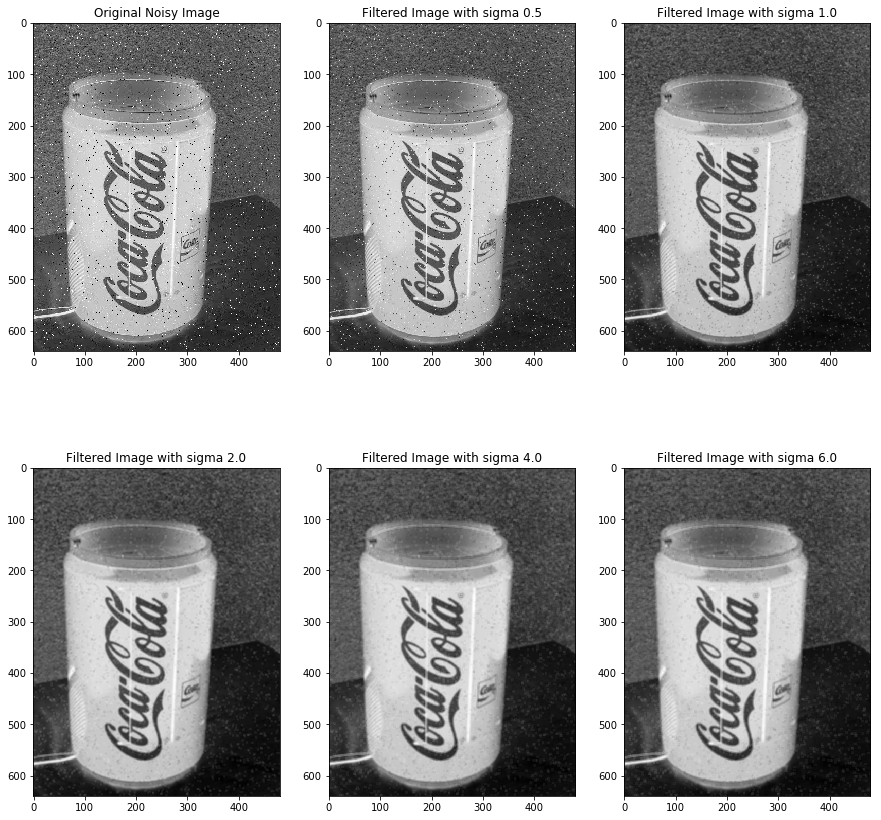

In [8]:
img = imread('noisycoke.jpg')
sigmas = [0.5, 1.0, 2.0, 4.0, 6.0]
fig = plt.figure(figsize=(15,15))

i = 2
ax = fig.add_subplot(2,3,1)
ax.title.set_text("Original Noisy Image")
ax.imshow(img, cmap="Greys")
for sigma in sigmas:
    print("Applying Gauss Filter with sigma " + str(sigma) + ". Please wait....")
    kernel = kerner2d(2, sigma)
    smooth = gaussfilter(img, kernel)
    ax1 = fig.add_subplot(2,3,i)
    i += 1
    ax1.title.set_text('Filtered Image with sigma ' + str(sigma))
    ax1.imshow(smooth, cmap="Greys")

Answer: We used sigma values (0.5, 1, 2, 4, 6) to observe the effect. We can observe that the performance of the smoothing increases with the increase of sigma value. This is because then the neighbouring pixels have more impact on the final pixel value as the kernel is more distributed away from the center.

# Section 1.4

In [9]:
def kerner1d(radius, sigma):
    length = (2 * radius) + 1
    output = np.zeros( shape=(1, length), dtype=np.double)
    total = 0
    for i in range(length):
        x = i - radius

        exp_val = -(x**2) / (2 * (sigma**2))
        gauss_val = math.exp(exp_val) / (math.sqrt(2 * math.pi) * sigma)
        output[0,i] = gauss_val
        total += output[0,i]
    
    output = output / total
            
    return output

Applying Gauss Filter with sigma 0.5. Please wait....
Applying Gauss Filter with sigma 1.0. Please wait....


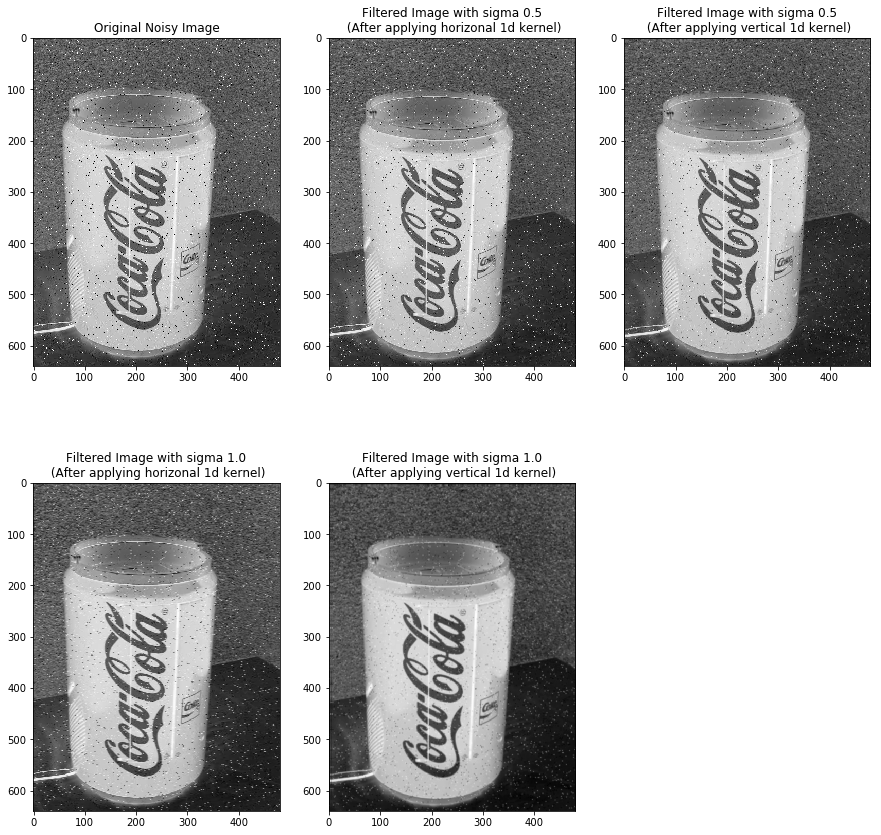

In [10]:
# Applying the 2d kernels as two 1d kernel seperately
# Horizontally first then vertically
img = imread('noisycoke.jpg')
sigmas = [0.5, 1.0]
fig = plt.figure(figsize=(15,15))

i = 2
ax = fig.add_subplot(2,3,1)
ax.title.set_text("Original Noisy Image")
ax.imshow(img, cmap="Greys")
for sigma in sigmas:
    print("Applying Gauss Filter with sigma " + str(sigma) + ". Please wait....")
    kernel = kerner1d(2, sigma)
    
    # Applying 1d kernel on the image and saving in smooth1 variable
    smooth1 = gaussfilter(img, kernel)
    ax1 = fig.add_subplot(2,3,i)
    i += 1
    ax1.title.set_text('Filtered Image with sigma ' + str(sigma) + '\n (After applying horizonal 1d kernel)')
    ax1.imshow(smooth1, cmap="Greys")
    
    # Applying kernel vertically on resultant smooth1 variable
    smooth2 = gaussfilter(smooth1, kernel.T)
    ax2 = fig.add_subplot(2,3,i)
    i += 1
    ax2.title.set_text('Filtered Image with sigma ' + str(sigma) + '\n (After applying vertical 1d kernel)')
    ax2.imshow(smooth2, cmap="Greys")

The running time for the new version is O(m * n * w) where (m * n) is the dimension of the image and (1 * w) is the dimension of the kernel. This is faster because we can see that here we need 3 nested loops compared to 4 nested loops required in section 1.2. And 2 * O(n^3) < O(n^4). This is computationaly cheaper also

# Answer for questions 2 and 3 are submitted in pdf file